# License Plate Detection and OCR Processing

## Table of Contents
1. [Frame Extraction](#frame-extraction)
2. [License Plate Detection](#license-plate-detection)
3. [Image Cropping](#image-cropping)
4. [OCR and Data Retrieval](#ocr-and-data-retrieval)

In this Jupyter notebook, we guide you through a comprehensive process of building a computer vision application with LandingLens focused on detecting and reading license plates from videos. Starting with frame extraction, followed by the detection and cropping of license plates, and finally, Optical Character Recognition (OCR) for data retrieval, each section is crafted to provide you with a conceptual understanding and practical code examples. By the end of this notebook, not only will you have a functioning license plate reader, but you'll also possess foundational knowledge and techniques that are transferable to a myriad of other computer vision applications. Whether you're aiming to recognize faces, track objects, or read text from images, the principles and methods showcased here will serve as a valuable cornerstone for your future projects.

<a name="frame-extraction"></a>
## Frame Extraction

In this section, we'll be extracting frames from a given video file. By reading the video frame-by-frame, we aim to save specific frames based on a set interval (e.g., every 100th frame) for further processing. This approach helps in reducing the computational load by processing only a subset of the frames instead of every single one.


In [10]:
import requests
import cv2
import numpy as np
import time
from landingai.postprocess import crop
from landingai.predict import Predictor, OcrPredictor
from landingai import visualize


# Replace 'path_to_video_file' with the actual path to your video file
video_file_path = '/Users/whit_blodgett/Desktop/Code/landing-apps-poc/license_plate_ocr_app/IMG_2464.MOV'

# 1. iPhone Video to image
def extract_frames(video_file_path):
    vidcap = cv2.VideoCapture(video_file_path)
    success, image = vidcap.read()
    count = 0
    frames = []
    while success:
        # save every 30th frame as jpg file (you can modify this based on your requirement)
        if count % 100 == 0:
            frames.append(image)
        success, image = vidcap.read()
        count += 1
    return frames

frames = extract_frames(video_file_path)

<a name="license-plate-detection"></a>

## License Plate Detection
Once we have our frames, the next step is to detect license plates within these frames. We'll be using a predefined API to help us detect the bounding boxes around the license plates. The results will be overlayed on the frames to visualize the detections.

No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image


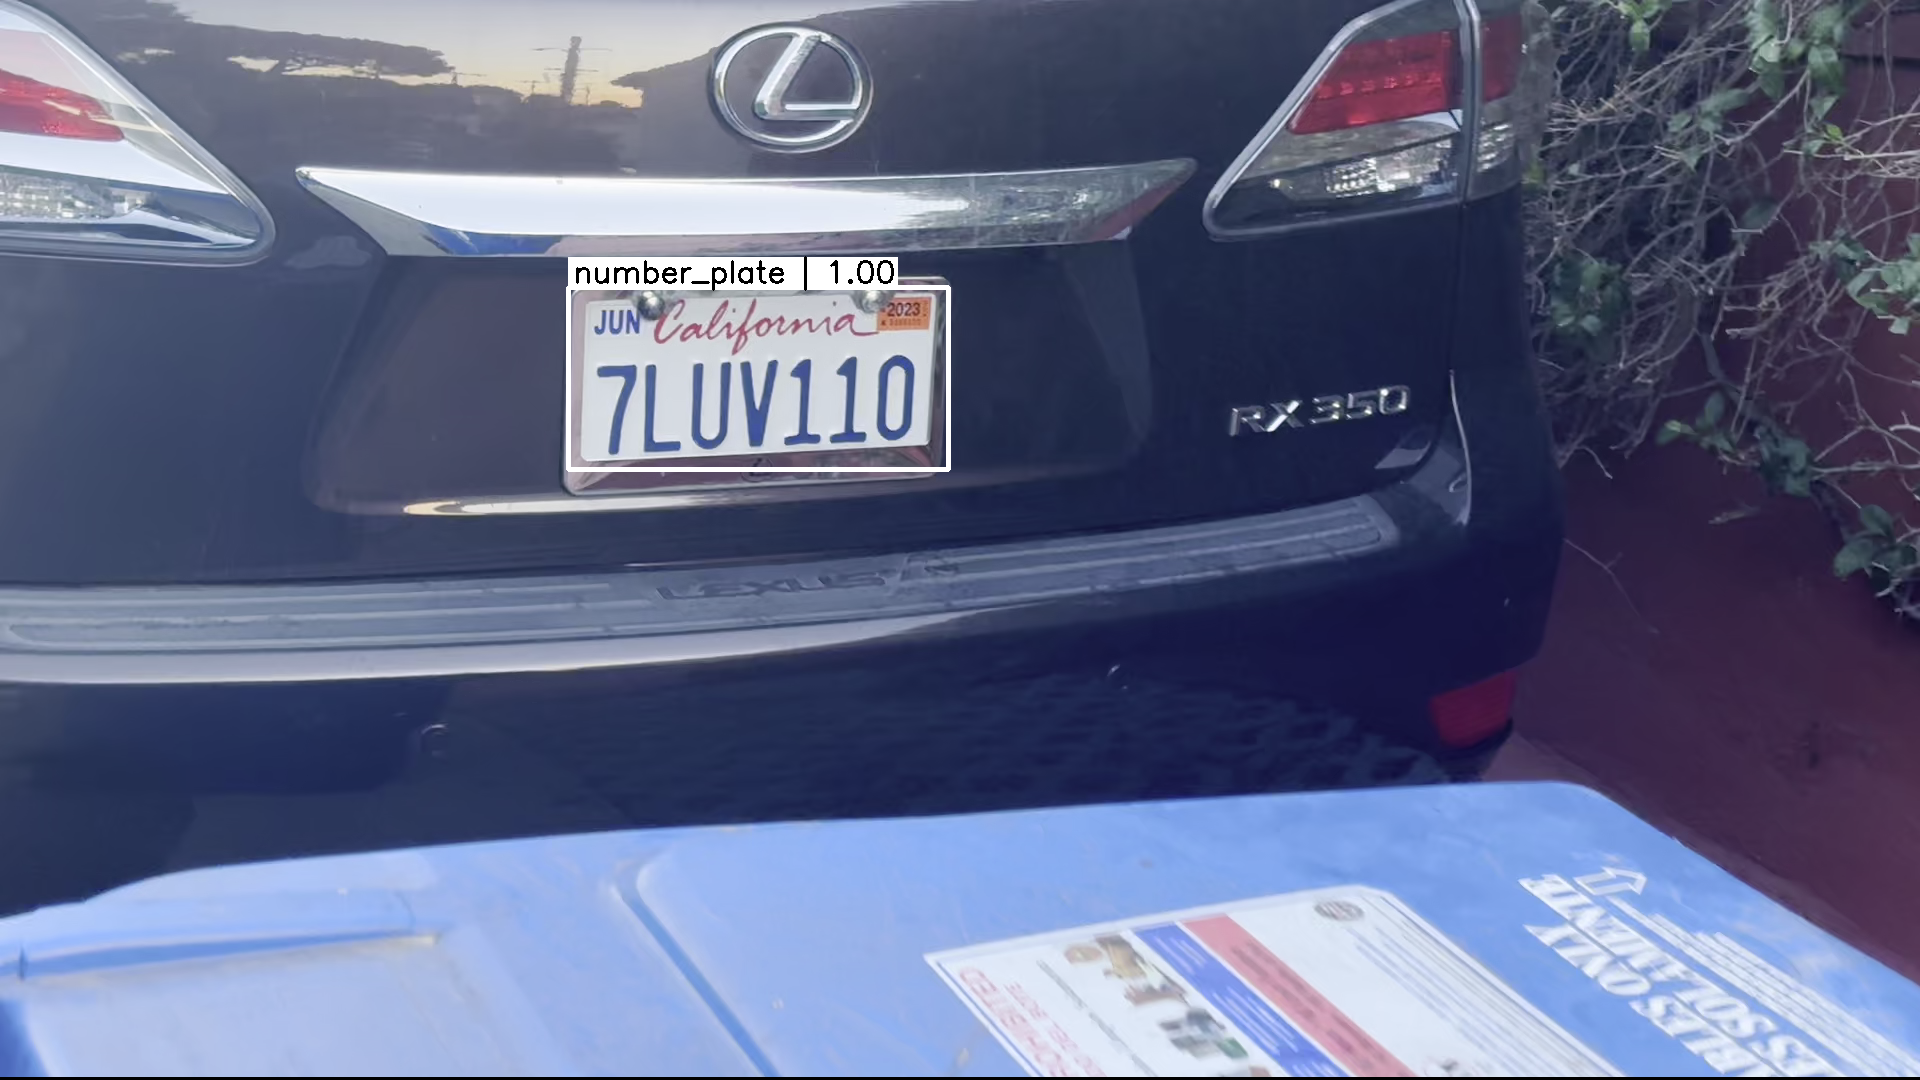

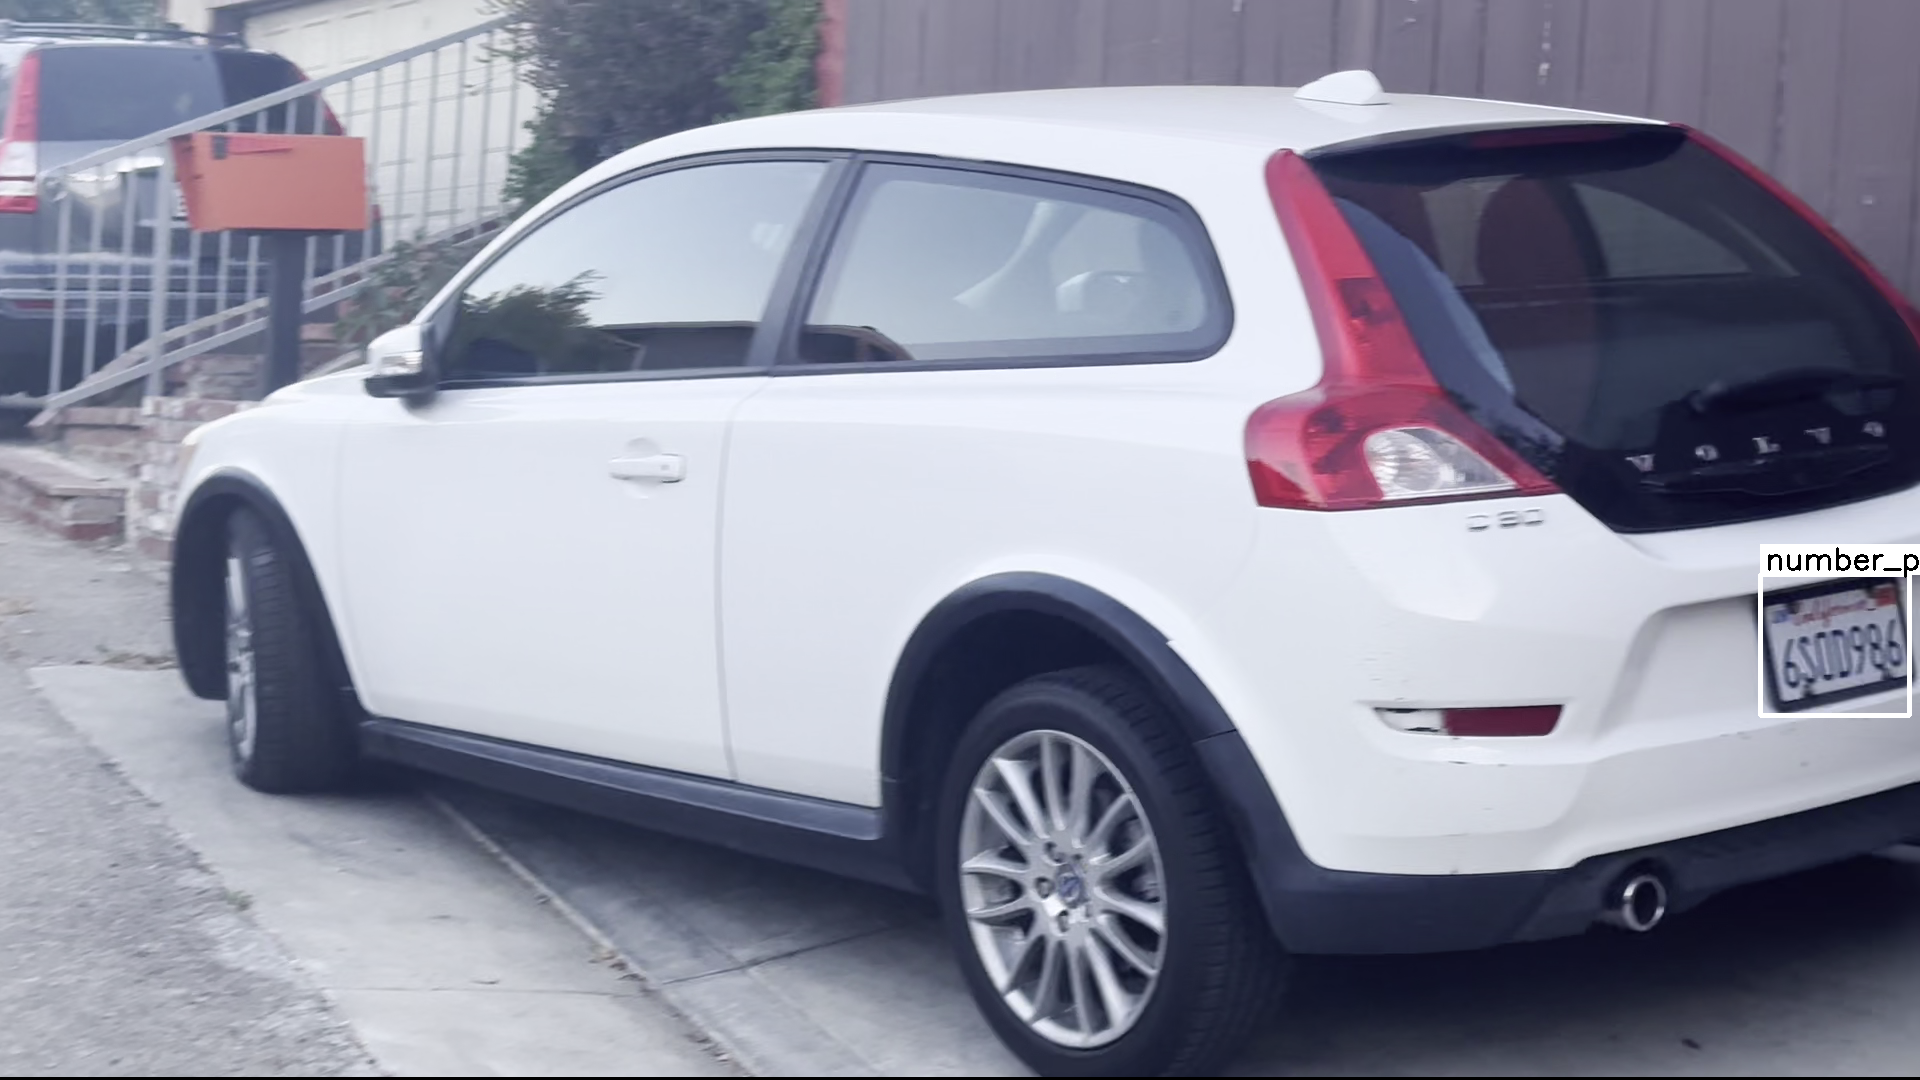

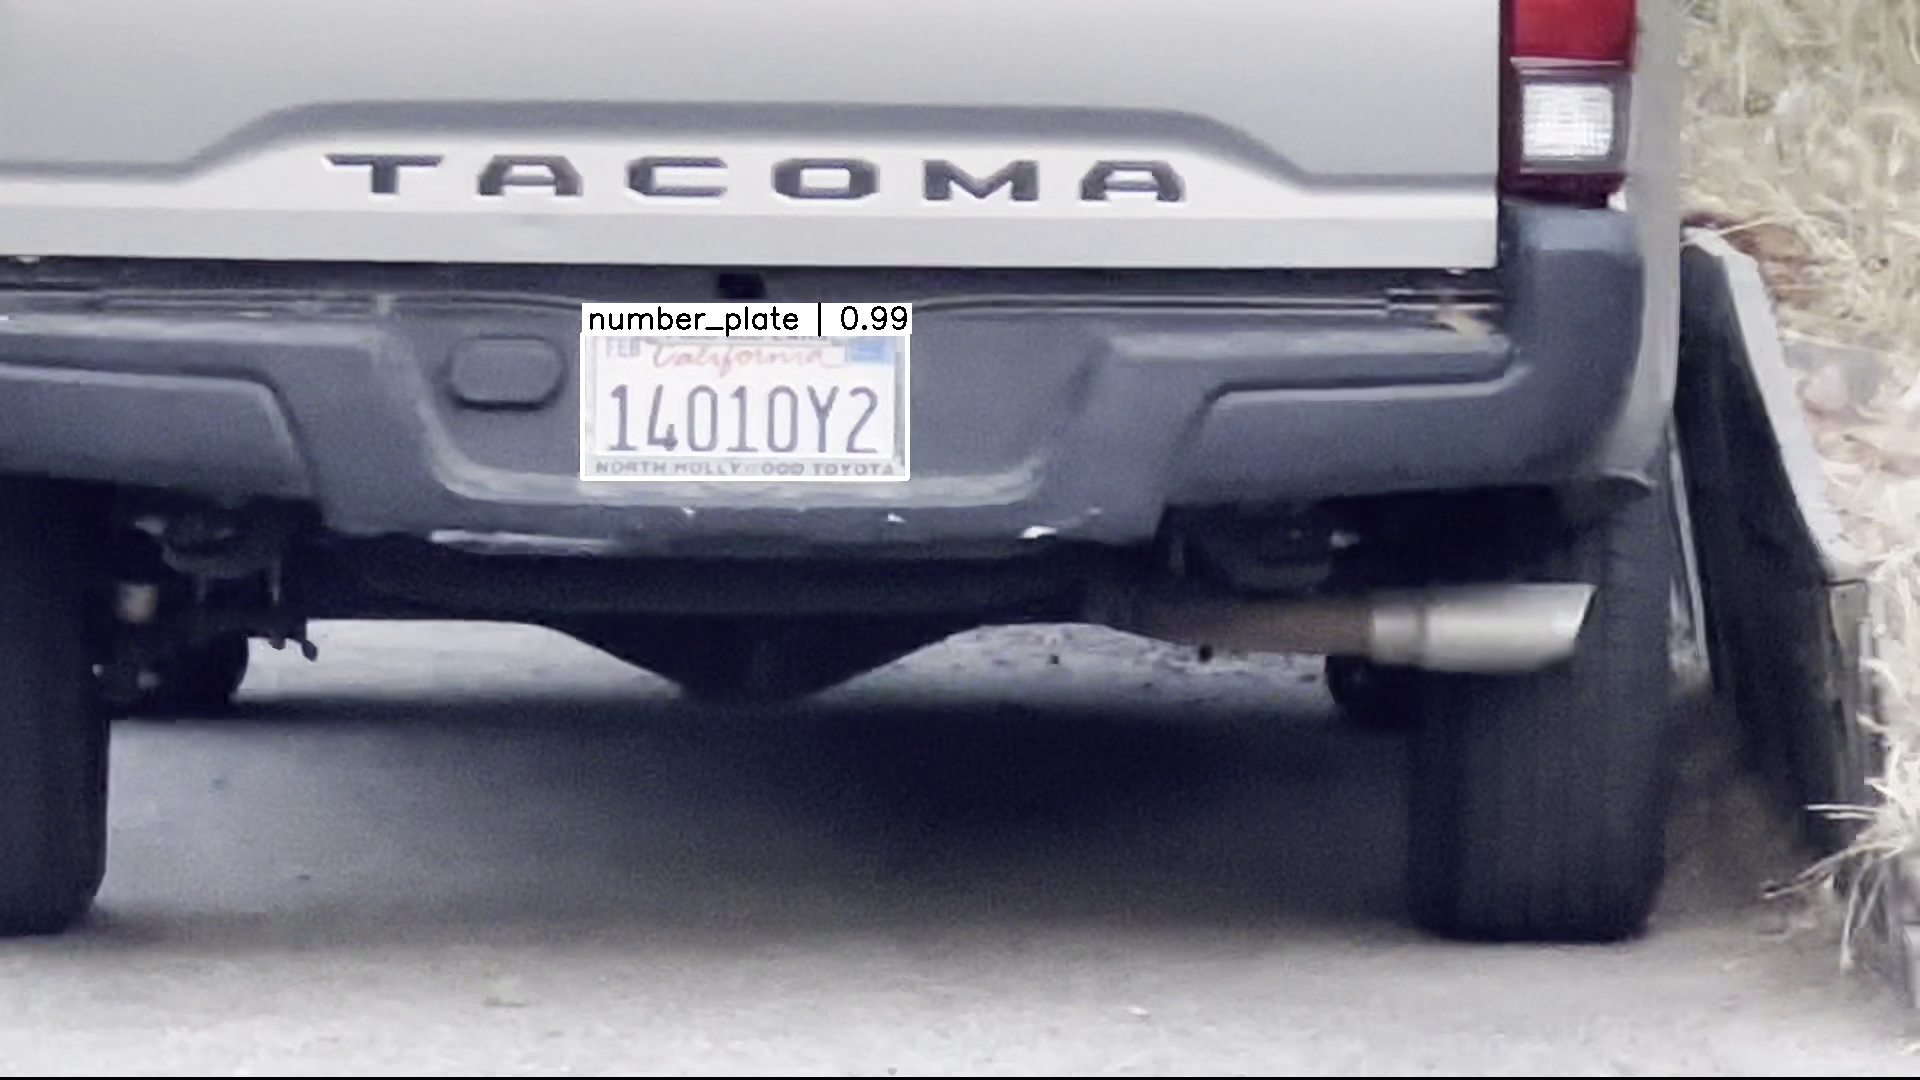

In [11]:
def detect_license_plates(frames):
    bounding_boxes = []
    overlayed_frames = []
    api_key = "land_sk_OdafnFLV340HT1eCdvm3Z4X3Xev8VP58iAhfqh6hAdnORL9ySq"
    model_endpoint = "972bcd20-31fc-4537-96f4-8b92e3a91408"
    predictor = Predictor(model_endpoint, api_key=api_key)
    
    for frame in frames:
        prediction = predictor.predict(frame)
        # store predictions in a list
        # convert to rgb
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        overlay = visualize.overlay_predictions(prediction, frame)
        bounding_boxes.append(prediction)
        overlayed_frames.append(overlay)

    return bounding_boxes, overlayed_frames

bounding_boxes, overlayed_frames = detect_license_plates(frames)

# show 5 overlayed frames
for i, frame in enumerate(overlayed_frames):
    if len(bounding_boxes[i]) == 0:
        continue
    display(frame)


<a name="image-cropping"></a>

## Image Cropping
With the detected bounding boxes, we'll be cropping the original images to isolate the license plates. This is crucial for ensuring the OCR model can read the license plate numbers and letters without unnecessary distractions from the surrounding scene.

In [6]:
# cropping the license plate
cropped_imgs = []
for frame, bboxes in zip(frames, bounding_boxes):
    cropped_imgs.append(crop(bboxes, frame))

print(len(cropped_imgs))
# show 5 overlayed frames
for i, cropped in enumerate(cropped_imgs):
    if len(cropped) == 0:
        continue
    for plate in cropped:
        display(plate)

0


<a name="ocr-and-data-retrieval"></a>

## OCR and Data Retrieval
In this section, we'll pass the cropped license plate images through an Optical Character Recognition (OCR) model. The OCR model's job is to convert the image of the license plate into a string of text, allowing us to retrieve the license plate number.

[<PIL.Image.Image image mode=RGB size=380x182 at 0x7FA4CF1BCDC0>]
[[OcrPrediction(score=0.882269561290741, text='2023', location=[(316, 12), (357, 12), (357, 30), (316, 30)]), OcrPrediction(score=0.9270818829536438, text='7LUV110', location=[(27, 78), (347, 64), (351, 154), (31, 168)]), OcrPrediction(score=0.8083034157752991, text='JUNCalifoma', location=[(21, 13), (305, 7), (306, 58), (22, 63)])], [OcrPrediction(score=0.8262313008308411, text='6S0D986', location=[(8, 60), (139, 31), (148, 101), (20, 131)])], [OcrPrediction(score=0.971376359462738, text='14010Y2', location=[(24, 52), (297, 52), (297, 119), (24, 119)]), OcrPrediction(score=0.5702727437019348, text='H', location=[(46, 130), (180, 130), (180, 139), (46, 139)])]]


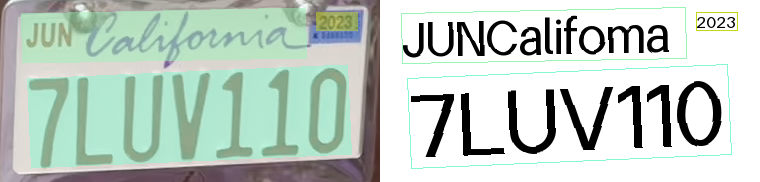

2023
7LUV110
JUNCalifoma


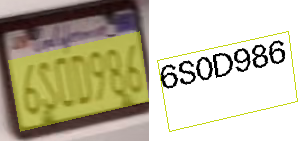

6S0D986


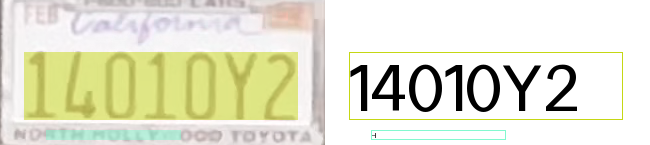

14010Y2
H


In [7]:

# set staging OCR API key 

import PIL.Image
ocr_predictor = OcrPredictor(api_key='land_sk_EkHnd6IDQvRVpgRcA3xCcUDAjDNqogs8Z3EKidTRctlZogIZwp')

ocr_preds = []
overlayed_ocr = []
print(cropped_imgs[0])
for frame in cropped_imgs:
    for plate in frame:
        ocr_pred = ocr_predictor.predict(plate)
        ocr_preds.append(ocr_pred)
        overlay = visualize.overlay_predictions(ocr_pred, plate)
        overlayed_ocr.append(overlay)
print(ocr_preds)
for frame, ocr_pred in zip(overlayed_ocr, ocr_preds):
    if len(ocr_pred) == 0:
        continue
    display(frame)
    for text in ocr_pred:
        print(text.text)

## Conclusion
Businesses can leverage this technology for enhanced parking lot management, toll collection, or even monitoring customer inflow in commercial areas. By harnessing the power of this system, stakeholders can drive operational efficiency, enhanced security, and ultimately, deliver tangible value across multiple domains.